In [68]:
def calc_monthly_pay(capital, num_terms, monthly_rate):
  return monthly_rate * capital / (1 -  ((1 + monthly_rate) ** (-num_terms)))

In [107]:
calc_monthly_pay(1000000, 360, 0.028/12)

4108.944431774588

In [108]:
calc_monthly_pay(800000, 360, 0.04/12)

3819.3223637236306

In [109]:
100/ 80

1.25

In [31]:
from functools import partial

monthly_pay_80w_base = partial(calc_monthly_pay, 800000, 360)
monthly_pay_100w_base = partial(calc_monthly_pay, 1000000, 360)

In [35]:
monthly_pay_80w_base(0.045/12)

4053.4824786070863

In [71]:
80 * 0.04

3.2

In [72]:
100 * 0.028

2.8000000000000003

In [47]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.optimize import minimize

from functools import partial

def compute_100w_rate(rate_80w):
  res = minimize(lambda r: (monthly_pay_80w_base(rate_80w) - monthly_pay_100w_base(r))**2, rate_80w, method='Nelder-Mead', tol=1e-6)
  return res.x[0]

In [85]:
compute_100w_rate(0.045/12)*12

0.026952724456787088

In [87]:
compute_100w_rate(0.00001)

-0.001183652343749998

In [89]:
rate_80w = np.linspace(0.0001, 0.1, 100)

In [90]:
rate_100w = np.array(list(map(compute_100w_rate, rate_80w/12)))*12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


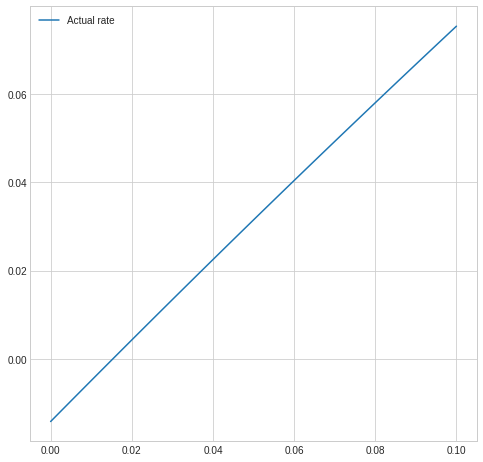

In [91]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

x = np.linspace(0, 0.1, 100)
ax.plot(x, rate_100w, label='Actual rate')
# plt.xlim([0, 0.1])
# plt.ylim([0, 0.1])
plt.legend()

In [104]:
a = np.linspace(0, 100, 3)

In [105]:
np.abs(a)

array([  0.,  50., 100.])

In [165]:
list(map(np.sqrt, a))

[0.0, 7.0710678118654755, 10.0]

In [123]:
class Mortgage():
  def __init__(self, capital, interest, terms):
    self.capital = capital
    self.interest = interest
    self.terms = terms
  
  def calc_monthly_pay(self):
    monthly_rate = self.interest/12
    capital = self.capital
    num_terms = self.terms
    return monthly_rate * capital / (1 -  ((1 + monthly_rate) ** (-num_terms)))

In [143]:
class CarMortgage(Mortgage):
  def __init__(self, capital, interest, terms):
     super().__init__(capital, interest, terms)
  
  def setModel(self, model):
    self.model = model

  def getModel(self):
    return self.model

In [149]:
class HouseMortgage(Mortgage):
  def __init__(self, capital, interest, terms):
     super().__init__(capital, interest, terms)
  
  def setHouseType(self, house):
    self.house = house

  def getHouseType(self):
    return self.house

In [166]:
h1 = HouseMortgage(1000000, 0.045, 360)
h1.setHouseType('4b4b')

In [169]:
x = 123

In [182]:
def add(x, y):
  return x, y

In [183]:
temp = [1, 2, 3, 5, 9]

In [184]:
from functools import reduce

In [185]:
reduce(add, temp)

((((1, 2), 3), 5), 9)

In [171]:
add

<function __main__.add>

In [172]:
h1

In [154]:
h1.calc_monthly_pay()

5066.853098258858

In [155]:
h1.getHouseType()

'4b4b'

In [145]:
c1 = CarMortgage(100000, 0.045, 36)

In [146]:
c1.setModel('Honda Civic')

In [138]:
c1.calc_monthly_pay()

2974.6924478376177

In [147]:
c1.getModel()

'Honda Civic'

In [124]:
m1 = Mortgage(800000, 0.045, 360)

In [125]:
m2 = Mortgage(1000000, 0.028, 360)

In [148]:
m1.setModel('Toyota Camry')

AttributeError: ignored

In [126]:
m1.calc_monthly_pay()

4053.4824786070863

In [127]:
m2.calc_monthly_pay()

4108.944431774588